In [32]:
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import pandas as pd
import io

In [2]:
uploaded = files.upload()

Saving data.csv to data (10).csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

**## Get none-numeric columns**


In [4]:
dfBrut    = df.select_dtypes(include=['object'])

In [5]:
dfInt     = df.select_dtypes(include=['int64'])

In [6]:
# On remarque la présence de doublones, on donc procédes à leur suppression

In [7]:
##dfUniq  = dfBrut.drop_duplicates()
##dfInt   = dfInt.drop_duplicates()

In [8]:
# On remarque aussi une incohérence dans la somme des valeurs de 'NA' des ['BsmtQual' 37, 'BsmtCond' 37, 'BsmtExposure' 38, 'BsmtFinType1' 37, 'BsmtFinType2' 38]

# BsmtFinType2 possède un 'NAN' dans la ligne 332 qui corresponent à 'Basement' alors que le reste des colonnes ont une valeur différente de 'NaN' ('NaN' voulant dire absence de sous-sol)
# BsmtExposure possède un 'NAN' dans la ligne 948 qui corresponent à 'Basement' alors que le reste des colonnes ont une valeur différente de 'NaN' ('NaN' voulant dire absence de sous-sol)

In [9]:
dfClean = dfBrut.drop(332)
dfClean = dfClean.drop(948)

dfInt   = dfInt.drop(332)
dfInt   = dfInt.drop(948)

dfClean

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
dfTarget = dfInt['SalePrice']

dfTarget

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

In [11]:
# On remarque 3 types de variables catégorielles : 
## 1. variables binaires
## 2. variables ordinales
## 3. variables nominales

In [12]:
# 1. Variables binaires ('CentralAir', 'Street')

#categories      = ['N', 'Y'']
#ordinalColumns  = ['CentralAir']

#categories      = ['Grvl', 'Pave']
#ordinalColumns  = ['Street']

binaryColumns = ['CentralAir', 'Street']

for col in binaryColumns:
  dfClean[col] = dfClean[col].iloc[:].map({'N': 0, 'Y': 1, 'Grvl': 0, 'Pave': 1})

dfClean[binaryColumns]

,CentralAir,Street
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1455,1,1
1456,1,1
1457,1,1
1458,1,1


In [13]:
## 2. variables ordinales

#categories      = ['NaN', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
#ordinalColumns  = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

#categories      = ['Low', 'HLS', 'Bnk', 'Lvl']
#ordinalColumns  = ['LandContour']

#categories      = ['Sev', 'Mod', 'Gtl']
#ordinalColumns  = ['LandSlope']

#categories      = ['No', 'Mn', 'Av', 'Gd']
#ordinalColumns  = ['BsmtExposure']  ####

#categories      = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
#ordinalColumns  = ['BsmtFinType1', 'BsmtFinType2']

#categories      = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
#ordinalColumns  = ['Electrical']

#categories      = ['Unf', 'RFn', 'Fin']
#ordinalColumns  = ['GarageFinish']


#categories      = ['MnWw', 'GdWo', 'MnPrv', 'GdPrv']
#ordinalColumns  = ['Fence']

#categories      = ['IR3', 'IR2', 'IR1', 'Reg']
#ordinalColumns  = ['LotShape']

ordinalColumns  = [
      'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
      'LandContour',
      'LandSlope',
      'BsmtExposure',
      'BsmtFinType1', 'BsmtFinType2',
      'Electrical',
      'GarageFinish',
      'Fence',
      'LotShape'
    ]

for col in ordinalColumns:
  dfClean[col] = dfClean[col].iloc[:].map(
      {
          'Po'  : 1, 'Fa'    : 2, 'TA'    : 3, 'Gd'    : 4, 'Ex'   : 5,  
          'Low' : 1, 'HLS'   : 2, 'Bnk'   : 3, 'Lvl'   : 4,
          'Sev' : 1, 'Mod'   : 2, 'Gtl'   : 3,
          'No'  : 1, 'Mn'    : 2, 'Av'    : 3, 'Gd'    : 4,
          'Unf' : 1, 'LwQ'   : 2, 'Rec'   : 3, 'BLQ'   : 4, 'ALQ'  : 5, 'GLQ': 6,
          'Mix' : 1, 'FuseP' : 2, 'FuseF' : 3, 'FuseA' : 4, 'SBrkr': 5,
          'Unf' : 1, 'RFn'   : 2, 'Fin'   : 3,
          'MnWw': 1, 'GdWo'  : 2, 'MnPrv' : 3, 'GdPrv' : 4,
          'IR3' : 1, 'IR2'   : 2, 'IR1'   : 3, 'Reg'   : 4
      })
  dfClean[col].fillna(0, inplace=True) 

dfClean[ordinalColumns]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,LandContour,LandSlope,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageFinish,Fence,LotShape
0,4,3,4.0,3.0,5,4,0.0,3.0,3.0,0.0,4,3,1.0,6.0,1.0,5.0,2.0,0.0,4
1,3,3,4.0,3.0,5,3,3.0,3.0,3.0,0.0,4,3,4.0,5.0,1.0,5.0,2.0,0.0,4
2,4,3,4.0,3.0,5,4,3.0,3.0,3.0,0.0,4,3,2.0,6.0,1.0,5.0,2.0,0.0,3
3,3,3,3.0,4.0,4,4,4.0,3.0,3.0,0.0,4,3,1.0,5.0,1.0,5.0,1.0,0.0,3
4,4,3,4.0,3.0,5,4,3.0,3.0,3.0,0.0,4,3,3.0,6.0,1.0,5.0,2.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4.0,3.0,5,3,3.0,3.0,3.0,0.0,4,3,1.0,1.0,1.0,5.0,2.0,0.0,4
1456,3,3,4.0,3.0,3,3,3.0,3.0,3.0,0.0,4,3,1.0,5.0,3.0,5.0,1.0,3.0,4
1457,5,4,3.0,4.0,5,4,4.0,3.0,3.0,0.0,4,3,1.0,6.0,1.0,5.0,2.0,4.0,4
1458,3,3,3.0,3.0,4,4,0.0,3.0,3.0,0.0,4,3,2.0,6.0,3.0,4.0,1.0,0.0,4


In [14]:
## 3. variables nominales

nominalColumns  = [
    'Alley', 'BldgType', 'Condition1', 'Condition2', 'Exterior1st' ,
    'Exterior2nd','Foundation','Functional','GarageType','Heating',
    'HouseStyle','LotConfig','MSZoning','MasVnrType','MiscFeature',
    'Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition',
    'SaleType', 'Utilities']

#for col in nominalColumns:
  #dfClean[col].fillna(0, inplace=True) 

dfOneHot                        = pd.get_dummies(dfClean[nominalColumns])
dfOneHot[list(binaryColumns)]   = dfClean[list(binaryColumns)]
dfOneHot[list(ordinalColumns)]  = dfClean[list(ordinalColumns)]

dfOneHot

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,PoolQC,LandContour,LandSlope,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageFinish,Fence,LotShape
0,0,0,1,0,0,0,0,0,0,1,...,0.0,4,3,1.0,6.0,1.0,5.0,2.0,0.0,4
1,0,0,1,0,0,0,0,0,1,0,...,0.0,4,3,4.0,5.0,1.0,5.0,2.0,0.0,4
2,0,0,1,0,0,0,0,0,0,1,...,0.0,4,3,2.0,6.0,1.0,5.0,2.0,0.0,3
3,0,0,1,0,0,0,0,0,0,1,...,0.0,4,3,1.0,5.0,1.0,5.0,1.0,0.0,3
4,0,0,1,0,0,0,0,0,0,1,...,0.0,4,3,3.0,6.0,1.0,5.0,2.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,0,0,1,...,0.0,4,3,1.0,1.0,1.0,5.0,2.0,0.0,4
1456,0,0,1,0,0,0,0,0,0,1,...,0.0,4,3,1.0,5.0,3.0,5.0,1.0,3.0,4
1457,0,0,1,0,0,0,0,0,0,1,...,0.0,4,3,1.0,6.0,1.0,5.0,2.0,4.0,4
1458,0,0,1,0,0,0,0,0,0,1,...,0.0,4,3,2.0,6.0,3.0,4.0,1.0,0.0,4


## Choix des features

In [28]:
## Corrélation 

dfALL               = dfOneHot.copy()
dfALL['SalePrice']  = dfTarget


correlation         = dfALL.corr()

In [29]:
correlation.head()

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,LandContour,LandSlope,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageFinish,Fence,LotShape,SalePrice
Alley_Grvl,1.000000,-0.032055,0.022669,0.076730,0.004405,-0.032850,-0.054883,0.197576,-0.029251,-0.056323,...,-0.010601,0.028926,-0.093922,-0.145458,-0.027101,-0.148098,-0.180487,0.039649,0.086571,-0.139094
Alley_Pave,-0.032055,1.000000,-0.170628,0.061209,-0.032713,0.092961,0.166809,-0.031385,-0.005031,0.031646,...,0.004245,0.008393,-0.073501,-0.065752,-0.047346,0.006679,-0.038697,-0.035222,0.040653,-0.027504
BldgType_1Fam,0.022669,-0.170628,1.000000,-0.332037,-0.433238,-0.392712,-0.656101,0.019708,0.002692,-0.053341,...,-0.029295,-0.040024,-0.014555,-0.057926,0.034396,-0.005906,0.061483,0.139660,-0.142282,0.137143
BldgType_2fmCon,0.076730,0.061209,-0.332037,1.000000,-0.028345,-0.025694,-0.042926,0.052744,0.026522,-0.037972,...,-0.041050,-0.052741,0.001862,-0.042715,-0.025035,-0.074131,-0.123385,-0.021953,0.078656,-0.097261
BldgType_Duplex,0.004405,-0.032713,-0.433238,-0.028345,1.000000,-0.033525,-0.056010,0.026698,0.114813,-0.095319,...,-0.026425,0.030055,-0.027207,-0.084958,-0.070113,-0.089826,-0.183033,-0.059738,0.058359,-0.114534


In [38]:
## Liste des Features avec Corrélation 

def getFeaturesByCorrelation(byK, target = "SalePrice", correlation = correlation):
    targetCorrelation = correlation[correlation[target].abs() >= byK ][target]
    return targetCorrelation, targetCorrelation.axes[0].to_list()

targetCorrelation, featuresByCorrelation = getFeaturesByCorrelation(.5)
featuresByCorrelation   

['ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'SalePrice']

In [73]:
## Liste des Features avec ANOVA
from sklearn.feature_selection import SelectKBest, f_regression

In [81]:
data = dfALL.copy()

# Séparer les variables explicatives (X) et la variable cible (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Sélectionner les 3 meilleures variables avec ANOVA
selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)

# Récupérer les noms des variables sélectionnées
featuresByANOVA = X.columns[selector.get_support(indices=True)].to_list()
print(featuresByANOVA)

['ExterQual', 'BsmtQual', 'KitchenQual']


In [39]:
## Liste des Features avec RandomForest Regressor

from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import numpy as np


In [43]:
def getFeaturesByRandomForest(df_arg, top_n, target = "SalePrice"):
    seed = np.random.seed(10)

    features = [col for col in df_arg.columns if col != target]

    X = df_arg.copy()[features]
    y = df_arg[target].values

    model = RandomForestRegressor(random_state = seed)
    model.fit(X,y)

    importance = model.feature_importances_

    indices = np.argsort(importance)

    feat_importances = pd.Series(importance, index=X.columns)

    plot = feat_importances.nlargest(top_n).plot(kind = 'barh', figsize = (10,5))
    plot.xlabel('importance')

    rf_features = pd.DataFrame(feat_importances.nlargest(top_n)).axes[0].tolist()

    return plot, rf_features

['ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'Neighborhood_NoRidge',
 'BsmtExposure',
 'GarageFinish',
 'BsmtFinType1',
 'LotShape',
 'Neighborhood_NridgHt',
 'HouseStyle_2Story',
 'GarageType_Attchd',
 'BldgType_1Fam',
 'LandContour',
 'Exterior2nd_HdBoard']

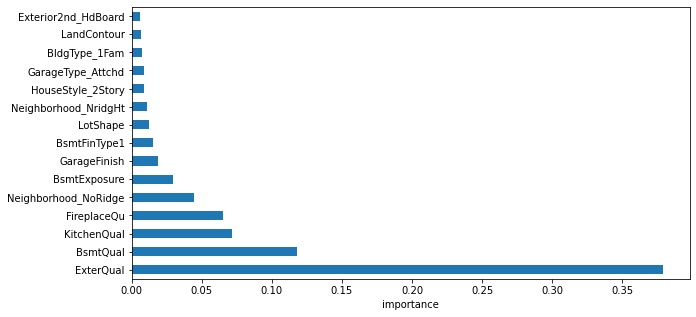

In [41]:
plot, featuresByRandomForest = getFeaturesByRandomForest(dfALL, 15)
featuresByRandomForest

In [42]:
## Liste des Features avec LasssoRegression

def getFeaturesByLasssoRegression(df_arg, target = "SalePrice"):
    np.random.seed(10)

    features = [col for col in df_arg.columns if col != target]

    X = df_arg.copy()[features]
    y = df_arg[target].values

    estimator = LassoCV(cv=5)

    sfm = SelectFromModel(estimator, prefit = False, norm_order = 1, max_features = None)
    sfm.fit(X,y)

    feature_idx = sfm.get_support()

    Lasso_features = X.columns[feature_idx].tolist()

    return Lasso_features

featuresByLasssoRegression = getFeaturesByLasssoRegression(dfALL)
featuresByLasssoRegression 

['Alley_Pave',
 'BldgType_1Fam',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition2_PosA',
 'Condition2_PosN',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_BrkFace',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Wd Shng',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_Slab',
 'Functional_Maj2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'Heating_GasW',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'MSZoning_C (all)',
 'MSZoning_RH',
 'MSZoning_RM',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVn

In [44]:
## Liste des Features avec Recursive Feature Selection

def getFeaturesByRecursiveFeatureSelection(df_arg, target = "SalePrice"):
    np.random.seed(10)

    features = [col for col in df_arg.columns if col != target]

    X = df_arg.copy()[features]
    y = df_arg[target].values

    rfe = RFE(estimator=LinearRegression(),n_features_to_select=15)
    rfe.fit(X,y)

    rfe_support = rfe.get_support()
    rfe_feat = X.loc[:,rfe_support].columns.to_list()

    return rfe_feat

featuresByRecursiveFeatureSelection = getFeaturesByRecursiveFeatureSelection(dfALL)
featuresByRecursiveFeatureSelection

['LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'SaleCondition_Normal',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD']

In [45]:
## Liste des Features avec Mutual Information Feature Selection

def getFeaturesByMIF(df_arg, target = "SalePrice"):
    np.random.seed(10)

    features = [col for col in df_arg.columns if col != target]

    X = df_arg.copy()[features]
    y = df_arg[target].values

    mif = SelectKBest(score_func=mutual_info_regression,k =15)
    mif.fit(X, y)

    mif_support = mif.get_support()

    mif_feat = X.loc[:,mif_support].columns.to_list()

    return mif_feat

featuresByMIF = getFeaturesByMIF(dfALL)
featuresByMIF   

['Exterior2nd_VinylSd',
 'Foundation_CBlock',
 'Foundation_PConc',
 'GarageType_Attchd',
 'GarageType_Detchd',
 'SaleType_New',
 'CentralAir',
 'ExterQual',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'BsmtExposure',
 'BsmtFinType1',
 'GarageFinish']

In [82]:
## Combinaison des features selectionnées par différentes méthodes

from collections import Counter

allFeatures       = featuresByCorrelation + featuresByANOVA + featuresByRandomForest + featuresByLasssoRegression + featuresByRecursiveFeatureSelection + featuresByMIF 
featureFrequence  = Counter(allFeatures)
dfFrequence = pd.DataFrame({"Feature" : featureFrequence.keys(), "Frequence" : featureFrequence.values()})
dfFrequence.sort_values("Frequence", ascending =False)

,Feature,Frequence
0,ExterQual,5
2,KitchenQual,5
1,BsmtQual,5
3,FireplaceQu,4
4,GarageFinish,4
...,...,...
45,Heating_GasW,1
15,Exterior2nd_HdBoard,1
43,GarageType_CarPort,1
42,GarageType_BuiltIn,1


In [83]:
featuresByK = dfFrequence.query("Frequence >= 2").Feature.to_list()

In [84]:
len(featuresByK)

24